In [ ]:
# 位置1: 氨基（-NH2）	羰基（C=O ）
# 位置1-2: 碳氮双键 （C=N） 碳氮单键（C–N）
# 位置3-4: 碳氮单键（C–N）碳碳单键（C–C）
# 位置4-5: 碳氮单键（C–N） 碳碳双键（C=C） 碳碳单键（C–C）
# 位置5-6: 碳碳双键（C=C）碳氮单键（C–N）
# 位置6: 甲基（–CH3 ） 伯醇（-CH₂-OH） 次氨基 (-NH-)  亚甲基（-CH-）


from itertools import combinations
# 定义数据
data = {
    'C': {'location1': '-NH2', 'location2': 'C2N', 'location3': 'C1N' , 'location4': 'C1N', 'location5': 'C2C' , 'location6': '-CH-'},
    'U': {'location1': '-NH2', 'location2': 'C1N', 'location3': 'C1N' , 'location4': 'C1N', 'location5': 'C2C' , 'location6': '-CH-'},
    'C': {'location1': '-NH2', 'location2': 'C2N', 'location3': 'C1N' , 'location4': 'C1N', 'location5': 'C2C' , 'location6': '-CH-'},
    'C': {'location1': '-C2O', 'location2': 'C2N', 'location3': 'C1N' , 'location4': 'C1N', 'location5': 'C2C' , 'location6': '-CH-'},

}

# 获取所有位点
all_positions = set()
for value in data.values():
    all_positions.update(value.items())

# 寻找最小覆盖
min_covering_set = None
min_covering_size = float('inf')

# 检查所有组合，寻找最小组合
for r in range(1, len(data) + 1):
    for comb in combinations(data.keys(), r):
        combined_positions = set()
        for key in comb:
            combined_positions.update(data[key].items())
        if all_positions.issubset(combined_positions):
            if r < min_covering_size:
                min_covering_size = r
                min_covering_set = comb

print("最小覆盖集合:", min_covering_set)


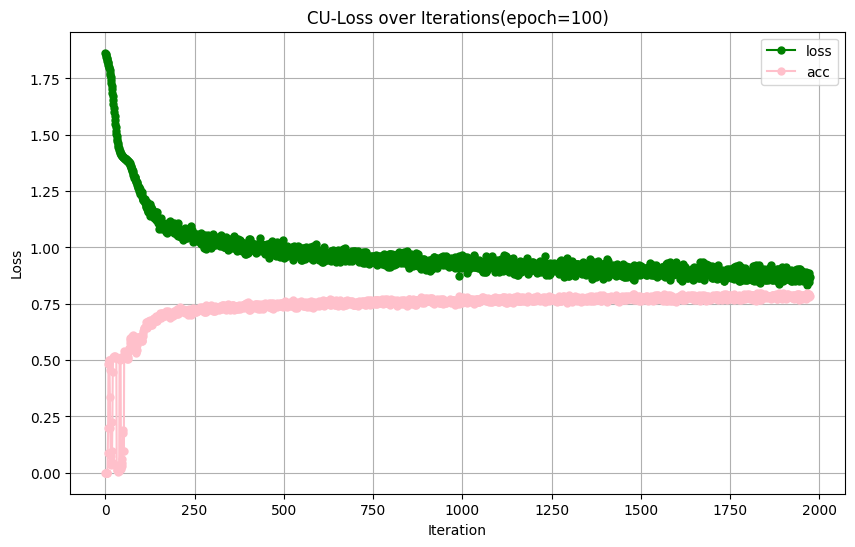

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# 读取数据文件
iterations = []
losses = []
acc=[]
epoch_num='100'

loss_file=f"/public/home/xiayini/project/NewL/Decoder/results_newdata/T_5mC/epoch100_trainDataset/batch.log"
# 读取文件并从第num行开始处理数据
num=0

with open(loss_file, 'r') as file:
    next(file)  # 跳过标题行
    for i, line in enumerate(file, start=1):
        if i < num+1:
            continue  # 跳过前num个数据
        # if i > 2*(num+1):
        # if i > num+200:
        #     break
        parts = line.strip().split()
        iterations.append(int(parts[0]))  # 读取 Iteration 列
        losses.append(float(parts[1]))    # 读取 Loss 列
        acc.append(float(parts[3]))    # 读取 Loss 列

# 转换为NumPy数组
iterations = np.array(iterations) - iterations[0] + num  # 使横坐标从第num次迭代开始
losses = np.array(losses)
acc = np.array(acc)

# # 定义拟合函数-二次多项式
# def poly2(x, a, b, c):
#     return a * x**2 + b * x + c

# # 拟合曲线
# popt, _ = curve_fit(poly2, iterations, losses)

# # 生成拟合曲线的y值
# fitted_losses = poly2(iterations, *popt)

# 绘制损失曲线
plt.figure(figsize=(10, 6))
plt.plot(iterations, losses, marker='o', linestyle='-', color='green', markersize=5, label='loss')
plt.plot(iterations, acc, marker='o', linestyle='-', color='pink', markersize=5, label='acc')
# plt.plot(iterations, fitted_losses, linestyle='--', color='pink', label='Fitted Curve')
plt.title(f'CU-Loss over Iterations(epoch={epoch_num})')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


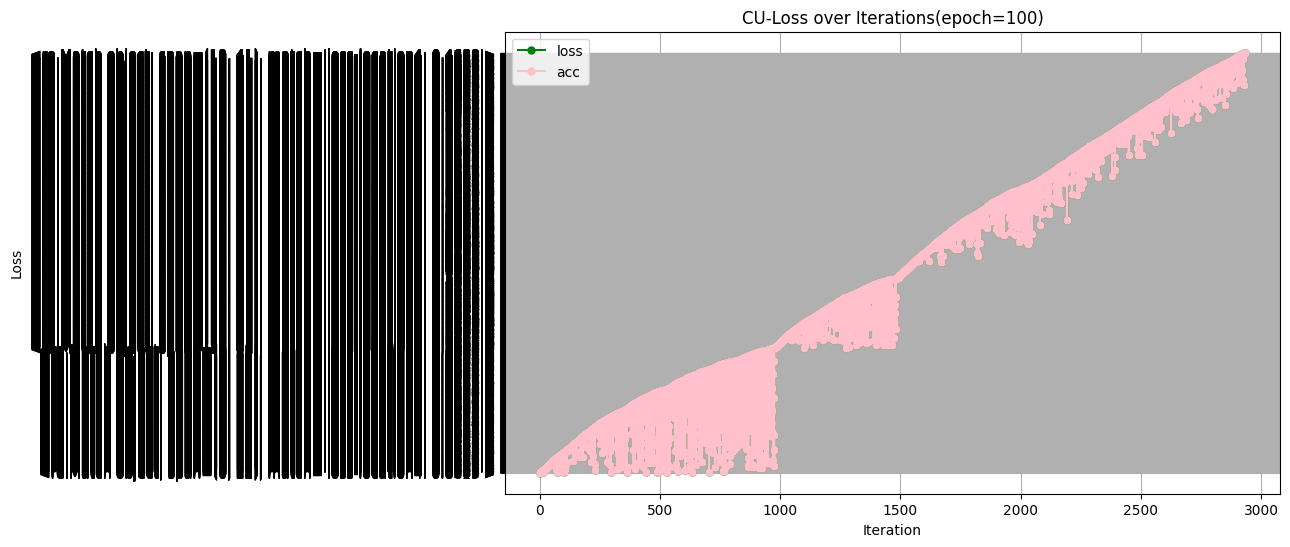

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import re

# 读取数据文件
iterations = []
losses1 = []
losses2 = []
acc=[]
epoch_num='100'

loss_file=f"/public/home/xiayini/project/NewL/Decoder/scripts/decoderV2.0/test_loss_epo50.txt"
# 读取文件并从第num行开始处理数据
num=2

with open(loss_file, 'r') as file:
    next(file)  # 跳过标题行
    for i, line in enumerate(file, start=1):
        if i < num+1:
            continue  # 跳过前num个数据
        # if i > 2*(num+1):
        # if i > num+200:
        #     break
        parts = line.strip().split(', ')
        iterations.append(i)  # 读取 Iteration 列
        # losses1.append(float(parts[0].split(': ')))    # 读取 Loss1 列
        losses1.append(str(re.search(r'loss-location4:\s*([^,]*)', line)))
        losses2.append(str(re.search(r'loss-location5:\s*([^,]*)', line)))
        # losses2.append(str(re.search(r'loss-location4:\s*(.*?)\s*\n', line)))

        # losses2.append(float(parts[2].split(': ')))    # 读取 Loss2 列

# 转换为NumPy数组
iterations
iterations = np.array(iterations) - iterations[0] + num  # 使横坐标从第num次迭代开始
losses1 = np.array(losses1)
losses2 = np.array(losses2)

# # 定义拟合函数-二次多项式
# def poly2(x, a, b, c):
#     return a * x**2 + b * x + c

# # 拟合曲线
# popt, _ = curve_fit(poly2, iterations, losses)

# # 生成拟合曲线的y值
# fitted_losses = poly2(iterations, *popt)

# 绘制损失曲线
plt.figure(figsize=(10, 6))
plt.plot(iterations, losses1, marker='o', linestyle='-', color='green', markersize=5, label='loss')
plt.plot(iterations, losses1, marker='o', linestyle='-', color='pink', markersize=5, label='acc')
# plt.plot(iterations, fitted_losses, linestyle='--', color='pink', label='Fitted Curve')
plt.title(f'CU-Loss over Iterations(epoch={epoch_num})')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()
